<a href="https://colab.research.google.com/github/kyungmo90/Ubion-Python/blob/main/20230103%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A7%88%EC%BC%80%ED%8C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
#matplotlib: 정적, 애니메이션 및 대화형 시각화를 생성하기 위한 포괄적인 라이브러리
#pyplot:matplotlib가 MATLAB처럼 작동하도록 하는 함수 모음
from pandas import DataFrame
#pandas:오픈 소스 데이터 분석 및 조작 도구
#DataFrame:행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있으며 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구
import numpy as np
#numpy:행렬/배열 처리 및 연산
from pandas import *

In [ ]:
import pandas as pd
df_salary = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/salary.csv")
df_salary

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199220,13.8,1
...,...,...,...,...
204,930,1509.099976,9.0,4
205,525,1097.099976,15.5,4
206,658,4542.600098,12.1,4
207,555,2023.000000,13.7,4


BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f5fa2f2b0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f6f5f97ff10>, <matplotlib.lines.Line2D object at 0x7f6f5f99d2b0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f6f5f99d610>, <matplotlib.lines.Line2D object at 0x7f6f5f99d970>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f6f5f97fbb0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f6f5f99dcd0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f6f5f99dfd0>], 'means': []})

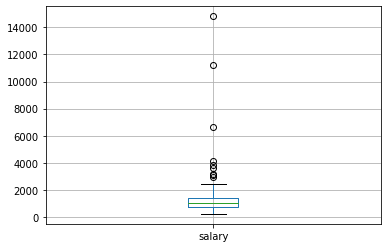

In [ ]:
df_salary.boxplot(column="salary", return_type="both")
#boxplot: 최솟값,Q1(lower), Q2(중앙값), Q3(upper), 최댓값
#통계를 낼 때 평균이나 표준편차를 많이 사용하는데 데이터에 이상치가 있으면 왜곡된 의미 전달 가능성 높음
#이상치가 있는지 확인하기 위해 박스플롯을 활용하여 이상치가 얼마나 포함되어 있는지 판단

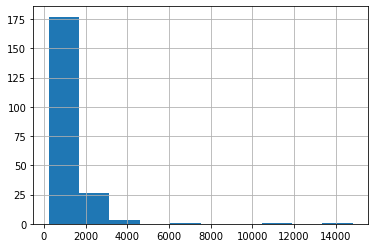

In [ ]:
df_salary["salary"].hist() #hist는 막대그래프

In [ ]:
q1 = df_salary["salary"].quantile(q=0.25)
q3 = df_salary["salary"].quantile(q=0.75)
IQR = q3-q1 #Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이
IQR #Interquartile range(사분위간 범위)

671.0

In [ ]:
data_IQR = df_salary[(df_salary["salary"] < q3 + IQR * 1.5) & (df_salary["salary"] > q1 - IQR * 1.5)] #1.5는 약속
data_IQR

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199220,13.8,1
...,...,...,...,...
204,930,1509.099976,9.0,4
205,525,1097.099976,15.5,4
206,658,4542.600098,12.1,4
207,555,2023.000000,13.7,4


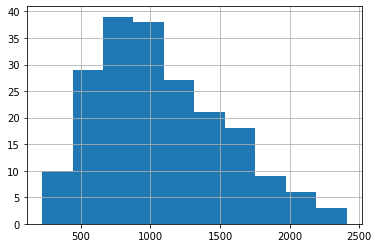

In [ ]:
data_IQR["salary"].hist()

In [ ]:
data_outlier=df_salary[(df_salary["salary"]>q3+IQR*1.5)] # q3 +IQR*1.5: 최댓값
data_outlier

,salary,sales,roe,industry
25,2983,57662.000000,19.000000,1
27,3844,20604.000000,12.100000,1
86,4143,2678.399902,14.400000,2
107,6640,8946.000000,10.200000,2
124,3142,10236.299800,35.700001,3
160,3068,3825.600098,21.500000,3
163,11233,6047.899902,22.900000,3
165,3646,3921.500000,7.800000,3
173,14822,2159.199951,19.400000,3


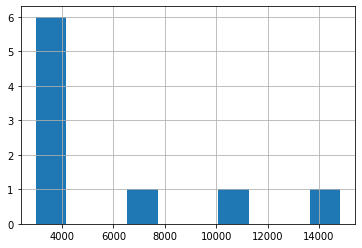

In [ ]:
data_outlier["salary"].hist()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv", encoding = "cp949") #encoding = "utf-8" cp949 = utf-8
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [ ]:
df.describe() # describe는 각종 통계량 요약

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
under_500 = df[df["고객ID"] <= 500]
upper_500 = df[df["고객ID"] > 500]
print(under_500)
print(upper_500)

     고객ID  이탈여부     총매출액  구매금액대  방문빈도  1회 평균매출액  할인권 사용 횟수  총 할인 금액  고객등급  \
0       1     1  4963160      1    22    225598          1     5445     1   
1       2     1  2271520      0    38     59777         22   350995     1   
2       3     1  2484250      0     2   1242125          6   186045     1   
3       4     1  2778850      0     9    308761          1     5195     2   
4       5     1  4437610      1    10    443761          9   246350     2   
..    ...   ...      ...    ...   ...       ...        ...      ...   ...   
495   496     0  3738330      0    13    287564          5   132345     2   
496   497     0  1981390      0    14    141528         22   350550     1   
497   498     0  7583360      2    32    236980         12   303250     2   
498   499     0  4381950      1    19    230629         17   365145     2   
499   500     0  9875170      2    42    235123          8   260450     2   

     구매유형  ...  구매카테고리수  거주지역  성별  고객 나이대  거래기간  할인민감여부  Recency  Frequency

In [ ]:
upper_500.head() # head는 데이터의 상단부분 확인

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
500,501,0,5746950,1,51,112685,20,368100,2,1,...,8,4,1,4,4134,0,7,5,6,80.058824
501,502,0,2603520,0,19,137027,26,365150,1,4,...,3,4,1,4,4135,0,4,1,2,216.631579
502,503,0,2815940,0,12,234662,20,347600,1,1,...,3,4,0,3,4136,0,4,1,2,343.666667
503,504,0,10838570,2,33,328442,9,246795,2,4,...,5,5,0,4,2569,1,1,3,4,76.848485
504,505,0,2227170,0,20,111359,29,374995,1,2,...,3,5,1,5,3931,0,4,2,2,195.550000


In [ ]:
under_500.head()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000


In [ ]:
df_join = under_500.append(upper_500) #append는 덧붙이기 새로운 요소를 맨 끝에 객체로 추가
print(df_join)

     고객ID  이탈여부      총매출액  구매금액대  방문빈도  1회 평균매출액  할인권 사용 횟수  총 할인 금액  고객등급  \
0       1     1   4963160      1    22    225598          1     5445     1   
1       2     1   2271520      0    38     59777         22   350995     1   
2       3     1   2484250      0     2   1242125          6   186045     1   
3       4     1   2778850      0     9    308761          1     5195     2   
4       5     1   4437610      1    10    443761          9   246350     2   
..    ...   ...       ...    ...   ...       ...        ...      ...   ...   
995   996     0  12731560      2    35    363759          3    44445     2   
996   997     0   3419010      0     6    569835          6   186545     1   
997   998     0   4612100      1    13    354777          8   260700     2   
998   999     0   5165360      1    28    184477         20   347700     1   
999  1000     0   4323050      1    16    270191         19   367045     2   

     구매유형  ...  구매카테고리수  거주지역  성별  고객 나이대  거래기간  할인민감여부  Recenc

In [ ]:
df_join.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [ ]:
y = df_join[["고객ID", "총매출액"]]

In [ ]:
x = df_join[["고객ID", "방문빈도", "고객등급", "구매유형","거주지역"]]

In [ ]:
y = pd.DataFrame(y)
x = pd.DataFrame(x)

In [ ]:
x

,고객ID,방문빈도,고객등급,구매유형,거주지역
0,1,22,1,3,6
1,2,38,1,1,4
2,3,2,1,2,6
3,4,9,2,4,5
4,5,10,2,4,6
...,...,...,...,...,...
995,996,35,2,3,6
996,997,6,1,2,6
997,998,13,2,1,4
998,999,28,1,3,5


In [ ]:
y

,고객ID,총매출액
0,1,4963160
1,2,2271520
2,3,2484250
3,4,2778850
4,5,4437610
...,...,...
995,996,12731560
996,997,3419010
997,998,4612100
998,999,5165360


In [ ]:
xy_merge = y.merge(x) #merge 데이터 병합
xy_merge

,고객ID,총매출액,방문빈도,고객등급,구매유형,거주지역
0,1,4963160,22,1,3,6
1,2,2271520,38,1,1,4
2,3,2484250,2,1,2,6
3,4,2778850,9,2,4,5
4,5,4437610,10,2,4,6
...,...,...,...,...,...,...
995,996,12731560,35,2,3,6
996,997,3419010,6,1,2,6
997,998,4612100,13,2,1,4
998,999,5165360,28,1,3,5


In [ ]:
!sudo apt-get install -y fonts-nanum #폰트 다운로드 리눅스 명령어
!sudo fc-cache -f -vv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic') #폰트 지정

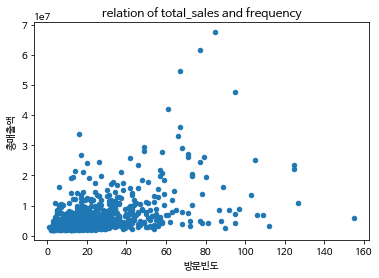

In [ ]:
xy_merge.plot.scatter(x = "방문빈도", y = "총매출액", title = "relation of total_sales and frequency")

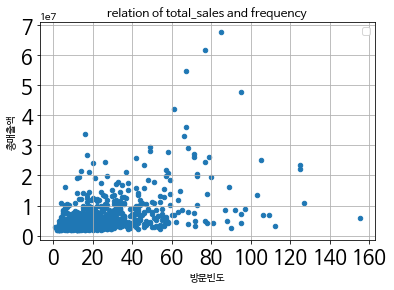

In [ ]:
%matplotlib inline
xy_merge.plot.scatter(x = "방문빈도", y = "총매출액", title = "relation of total_sales and frequency")
#scatter: 흩뿌리다/ 산점도 표현할때 유용함
plt.legend()
plt.grid()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv", encoding = "cp949") #encoding = "utf-8" cp949 = utf-8
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
print(df.groupby("성별").mean()) #mean 평균계산

          고객ID      이탈여부          총매출액     구매금액대       방문빈도       1회 평균매출액  \
성별                                                                           
0   517.180025  0.268804  5.781799e+06  0.704069  23.112207  344725.376079   
1   428.925926  0.433862  6.185048e+06  0.682540  22.047619  383757.052910   

    할인권 사용 횟수        총 할인 금액      고객등급      구매유형   클레임접수여부   구매카테고리수  \
성별                                                                     
0   16.046856  294429.001233  1.558570  2.637485  0.358816  5.200986   
1   15.941799  283543.650794  1.492063  2.735450  0.312169  5.285714   

        거주지역    고객 나이대         거래기간    할인민감여부   Recency  Frequency  Monetary  \
성별                                                                             
0   5.161529  3.921085  3520.073983  0.418002  4.906289   2.278668  4.141800   
1   5.084656  4.148148  3392.121693  0.322751  5.005291   2.333333  4.074074   

       평균 구매주기  
성별              
0   262.104400  
1   287.376485  


In [ ]:
print(df.groupby("성별").var()) #var 분산계산

            고객ID      이탈여부          총매출액     구매금액대        방문빈도      1회 평균매출액  \
성별                                                                             
0   82541.937921  0.196791  2.874438e+13  0.620959  348.378752  9.824220e+10   
1   81278.845548  0.246932  5.556999e+13  0.568896  433.003040  9.428816e+10   

    할인권 사용 횟수       총 할인 금액      고객등급      구매유형   클레임접수여부   구매카테고리수      거주지역  \
성별                                                                              
0   68.582987  1.216729e+10  0.246874  1.085704  0.230351  4.876839  1.399802   
1   74.225318  1.406279e+10  0.251266  1.131769  0.215862  5.268997  1.226838   

      고객 나이대          거래기간    할인민감여부   Recency  Frequency  Monetary  \
성별                                                                    
0   1.176481  9.056816e+05  0.243577  3.006022   2.682742  2.432954   
1   1.073680  1.042798e+06  0.219746  3.207419   3.255319  2.451931   

         평균 구매주기  
성별                
0   65957.588656  
1   58336.30

In [ ]:
print(df.groupby("성별").std()) #std 표준편차계산

          고객ID      이탈여부          총매출액     구매금액대       방문빈도       1회 평균매출액  \
성별                                                                           
0   287.301128  0.443611  5.361378e+06  0.788009  18.664907  313436.120237   
1   285.094450  0.496923  7.454528e+06  0.754252  20.808725  307063.772432   

    할인권 사용 횟수        총 할인 금액      고객등급      구매유형   클레임접수여부   구매카테고리수  \
성별                                                                     
0    8.281485  110305.453399  0.496864  1.041971  0.479949  2.208357   
1    8.615412  118586.636918  0.501265  1.063846  0.464609  2.295430   

        거주지역    고객 나이대         거래기간    할인민감여부   Recency  Frequency  Monetary  \
성별                                                                             
0   1.183132  1.084657   951.673064  0.493535  1.733788   1.637908  1.559793   
1   1.107627  1.036185  1021.174835  0.468770  1.790927   1.804250  1.565864   

       평균 구매주기  
성별              
0   256.822095  
1   241.529105  


In [ ]:
print(df.총매출액.skew()) #위도

4.649270270840756


In [ ]:
print(df.총매출액.kurt()) #척도

32.586256242003


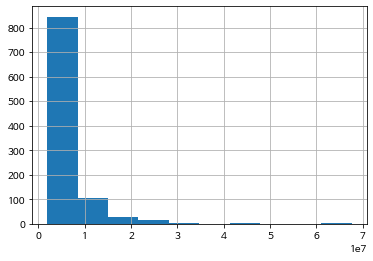

In [ ]:
df.총매출액.hist()

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping2.csv", encoding = "cp949") #encoding = "utf-8" cp949 = utf-8
df2

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
import math
#math:좀 더 복잡한 연산이 필요한 경우 math 모듈을 사용
from sklearn import preprocessing
#sklearn:예측 데이터 분석을 위한 간단하고 효율적인 도구
#preprocessing:전처리(원하는 형태로 변형)
from sklearn.preprocessing import MinMaxScaler #minmaxscaler 정규화
#sklearn.preprocessing:스케일링, 변환
from sklearn.preprocessing import StandardScaler#standaradsclaer 표준화
from scipy.stats import boxcox

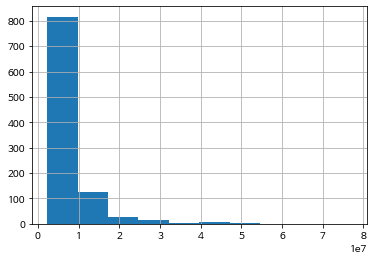

In [ ]:
df2.총_매출액.hist()

In [ ]:
df2["총_매출액_scale"] = preprocessing.scale(df2["총_매출액"])
df2["총_매출액_scale"]

0     -0.439705
1     -0.560155
2     -0.630187
3     -0.161153
4      0.958981
         ...   
995   -0.277702
996    0.466331
997   -0.621496
998    0.603243
999   -0.558076
Name: 총_매출액_scale, Length: 1000, dtype: float64

In [ ]:
df2["총_매출액_scale"].describe()

count    1.000000e+03
mean     4.440892e-17
std      1.000500e+00
min     -6.889126e-01
25%     -5.407834e-01
50%     -3.380653e-01
75%      1.194335e-01
max      1.005364e+01
Name: 총_매출액_scale, dtype: float64

In [ ]:
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df2) #fit_transform은 train dataset에서만 사용
df_minmax
df_minmax = pd.DataFrame(df_minmax)
df2["총_매출액_minmax"] = df_minmax[2]
df2["총_매출액_minmax"]

0      0.023198
1      0.011986
2      0.005467
3      0.049128
4      0.153399
         ...   
995    0.038279
996    0.107539
997    0.006276
998    0.120284
999    0.012179
Name: 총_매출액_minmax, Length: 1000, dtype: float64

In [ ]:
x = df2[["이탈여부", "방문빈도", "할인권_사용 횟수"]]
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)
x_minmax = pd.DataFrame(x_minmax)
x_minmax

,0,1,2
0,0.0,0.074627,0.000000
1,1.0,0.059701,0.724138
2,0.0,0.079602,0.172414
3,0.0,0.074627,0.000000
4,0.0,0.353234,0.275862
...,...,...,...
995,0.0,0.029851,0.068966
996,0.0,0.233831,0.172414
997,0.0,0.039801,0.241379
998,0.0,0.064677,0.655172


In [ ]:
x = df2[["이탈여부", "방문빈도", "할인권_사용 횟수"]]
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)
x_minmax = pd.DataFrame(x_minmax)
x_minmax.columns

RangeIndex(start=0, stop=3, step=1)

In [ ]:
x_scale = df2[["방문빈도", "할인권_사용 횟수"]]
x_noscale = df[["이탈여부", "거주지역"]]
scaler = MinMaxScaler()
x_scale_minmax = scaler.fit_transform(x_scale)
x_scale_minmax = pd.DataFrame(x_scale_minmax)
x_scale_minmax
x_scale_minmax2 = scaler.fit_transform(x_noscale)
x_scale_minmax2 = pd.DataFrame(x_scale_minmax2)
x_scale_minmax2

,0,1
0,1.0,0.833333
1,1.0,0.500000
2,1.0,0.833333
3,1.0,0.666667
4,1.0,0.833333
...,...,...
995,0.0,0.833333
996,0.0,0.833333
997,0.0,0.500000
998,0.0,0.666667


In [ ]:
x = pd.DataFrame(["방문빈도", "할인권_사용 횟수"])
x[["방문빈도", "할인권_사용 횟수"]] = x_scale_minmax[0:2]
x

,0,방문빈도,할인권_사용 횟수
0,방문빈도,0.074627,0.000000
1,할인권_사용 횟수,0.059701,0.724138


In [ ]:
df2

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,6,-0.439705,0.023198
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,6,5,3,6,6,6,-0.560155,0.011986
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,-0.630187,0.005467
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,-0.161153,0.049128
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,5,6,6,5,6,0.958981,0.153399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,7,6,7,6,6,6,6,6,-0.277702,0.038279
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,5,6,5,7,6,6,6,0.466331,0.107539
997,998,0,2741290,10,274129,8,260700,2,4,0,...,6,6,5,6,4,5,6,5,-0.621496,0.006276
998,999,0,11268990,15,751266,20,347700,1,3,0,...,4,4,4,4,5,5,4,4,0.603243,0.120284


In [ ]:
from scipy import stats #과학, 분석, 그리고 엔지니어링을 위한 과학적 컴퓨팅 영역의 여러 기본적인 작업을 위한 라이브러리

In [ ]:
#일표본 t-test
print(df2.총_매출액.mean())
print(stats.ttest_1samp(df2["총_매출액"], 7700000))

7068689.76
Ttest_1sampResult(statistic=-2.8657430145836007, pvalue=0.00424758614832654)


In [ ]:
#일표본 t-test
print(df2.총_매출액.mean())
print(stats.ttest_1samp(df2["총_매출액"], 7068689))

7068689.76
Ttest_1sampResult(statistic=3.449911869706077e-06, pvalue=0.9999972480573434)


In [ ]:
#독립표본 t-test
no_claim = df[df2["클레임접수여부"]==0]
no_claim
claim = df2[df2["클레임접수여부"]==1]
claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,-0.630187,0.005467
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,-0.161153,0.049128
7,8,0,12717240,109,116672,4,354735,1,2,1,...,5,7,6,6,5,6,6,6,0.811239,0.139646
13,14,0,4098600,15,273240,14,334100,2,4,1,...,6,6,6,4,5,7,6,6,-0.426561,0.024422
14,15,0,3754700,21,178795,23,380200,2,4,1,...,6,6,7,4,5,5,5,5,-0.475952,0.019824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,0,5358350,16,334897,26,364650,1,4,1,...,5,6,5,5,6,6,6,6,-0.245637,0.041264
986,987,0,7879000,35,225114,14,333850,1,2,1,...,7,6,6,4,5,6,6,6,0.116376,0.074963
989,990,0,2540870,15,169391,23,379950,2,4,1,...,5,6,5,6,6,5,5,5,-0.650281,0.003596
991,992,0,9302490,40,232562,10,304450,1,2,1,...,6,6,6,6,6,6,6,6,0.320816,0.093993


In [ ]:
no_claim.방문빈도.mean()

23.410351201478743

In [ ]:
claim.방문빈도.mean()

24.736383442265794

In [ ]:
print(stats.ttest_ind(no_claim["방문빈도"], claim["방문빈도"], equal_var=False))

Ttest_indResult(statistic=-1.074206472680084, pvalue=0.28299509596272465)


In [ ]:
!pip install pingouin #pingouin: pandas와 numpy를 기반으로 한 오픈소스 통계 패키지
!pip install scikit_posthocs #scikit_posthocs: ANOVA 테스트에서 통계적으로 유의미한 결과를 얻은 경우 그룹 수준 간의 차이를 평가하기 위해 통계 데이터 분석에서 일반적으로 수행되는 쌍별 다중 비교를 위한 사후 테스트를 제공하는 Python 패키지

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
#ols 회귀분석시 사용
from statsmodels.stats.anova import anova_lm
#anova_lm 분산분석시 사용

In [ ]:
df2["구매유형"].describe()

count    1000.000000
mean        3.093000
std         0.988599
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: 구매유형, dtype: float64

In [ ]:
df1 = df2[["구매유형", "총_매출액"]]
pd.options.display.float_format = '{:.3f}'.format
type1 = [ ]
for i in range(1,5, 1) :
    type1.append(df1[df1.구매유형 ==i].총_매출액)
sp.stats.levene(type1[0],type1[1],type1[2],type1[3]) #등분산 분석: 등분산이다(귀무), 등분산 아니다(대립)

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [ ]:
pg.welch_anova(dv = "총_매출액", between = "구매유형", data = df2) #등분산이 아닌 경우
#귀무가설: 각 구매유형 별로 총매출액 평균이 같다.
#대립가설: 각 구매유형 별로 총매출액 평균이 다르다.

,Source,ddof1,ddof2,F,p-unc,np2
0,구매유형,3,230.936,88.238,0.000,0.193


In [ ]:
model = ols("총_매출액 ~ 구매유형", data=df1).fit() # 등분산인 경우
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
구매유형,1.000,3386995098917810.500,3386995098917810.500,74.958,0.000
Residual,998.000,45094574393149120.000,45184944281712.547,NaN,NaN


In [ ]:
pg.homoscedasticity(dv='총_매출액', group = '구매유형', data=df2) #등분산 분석

,W,pval,equal_var
levene,61.838,0.000,False


In [ ]:
pg.anova(dv='총_매출액', between = '구매유형', data =df2, detailed=True) #등부산 가정
#집단 별로 볼 경우 위에것만 보면 됌
#Within은 볼 필요 없음

,Source,SS,DF,MS,F,p-unc,np2
0,구매유형,9376756399592748.000,3,3125585466530916.000,79.609,0.000,0.193
1,Within,39104813092474192.000,996,39261860534612.641,NaN,NaN,NaN


#20230105

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

In [ ]:
df1 = df2[['총_매출액','1회_평균매출액','총_할인_금액','방문빈도','구매_카테고리_수']]
df1.corr(method = "pearson")

,총_매출액,1회_평균매출액,총_할인_금액,방문빈도,구매_카테고리_수
총_매출액,1.000,0.314,-0.005,0.631,0.308
1회_평균매출액,0.314,1.000,-0.018,-0.280,-0.152
총_할인_금액,-0.005,-0.018,1.000,0.045,0.023
방문빈도,0.631,-0.280,0.045,1.000,0.396
구매_카테고리_수,0.308,-0.152,0.023,0.396,1.000


In [ ]:
!sudo apt-get install -y fonts-nanum #한글 적용용
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


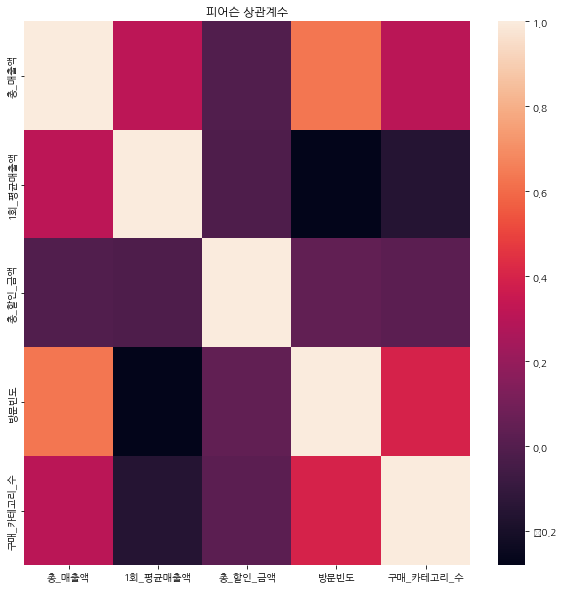

In [ ]:
matplotlib.rcParams['font.family'] = "NaNumGothic"
clolormap = plt.cm.PuBu
plt.figure(figsize=(10,10))
plt.title("피어슨 상관계수")
sns.heatmap(df1.astype(float).corr())

In [ ]:
from sklearn.decomposition import PCA
df = df2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [ ]:
df.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
총_매출액_scale           0
총_매출액_minmax          0
dtype: int64

In [ ]:
df = df.dropna(axis=0)
df.isnull().sum()

고객ID                0
이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용 횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
총_매출액_scale         0
총_매출액_minmax        0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

In [ ]:
features = ['고객ID', '이탈여부', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax']

In [ ]:
x = df.drop(["총_매출액"], axis=1).values
y = df["총_매출액"].values
x = StandardScaler().fit_transform(x)#표준화
x = pd.DataFrame(x, columns = features)
x

,고객ID,이탈여부,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
0,-1.732,-0.267,-0.442,-0.350,-1.803,-2.584,-0.606,0.906,-0.908,0.728,...,0.388,0.248,0.369,0.709,0.576,0.366,0.635,0.674,-0.426,-0.426
1,-1.722,-0.267,-0.442,0.138,-1.803,-2.587,-0.606,0.906,1.101,-0.111,...,-0.977,0.248,0.369,0.709,0.576,0.366,-0.622,0.674,-0.144,-0.144
2,-1.718,-0.267,2.241,-0.553,-0.847,-0.420,-0.606,-1.107,-0.908,0.728,...,0.388,0.248,-0.872,-0.373,0.576,0.366,-0.622,0.674,0.991,0.991
3,-1.715,-0.267,-0.010,-0.811,0.467,0.494,-0.606,0.906,-0.908,-0.111,...,0.388,0.248,-0.872,-0.373,-0.433,0.366,0.635,-0.675,-0.525,-0.525
4,-1.711,-0.267,-0.969,0.331,1.661,0.789,-0.606,-2.114,-0.908,0.728,...,0.388,-2.312,0.369,-0.373,-1.442,-0.865,-0.622,-2.024,-0.664,-0.664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1.697,-0.267,-0.298,1.291,0.825,0.784,-0.606,-0.101,-0.908,1.568,...,0.388,-1.032,0.369,1.791,0.576,0.366,0.635,0.674,0.794,0.794
837,1.701,-0.267,-0.873,1.387,-1.564,-2.234,-0.606,-0.101,1.101,0.728,...,1.753,0.248,1.610,0.709,0.576,0.366,0.635,0.674,-0.262,-0.262
838,1.704,-0.267,1.091,-0.458,-1.205,-0.957,-0.606,-1.107,-0.908,0.728,...,0.388,-1.032,0.369,-0.373,1.585,0.366,0.635,0.674,0.492,0.492
839,1.711,-0.267,-0.537,1.855,0.467,0.490,-0.606,-0.101,-0.908,-0.111,...,-2.343,-2.312,-2.114,-1.455,-0.433,-0.865,-1.879,-2.024,0.631,0.631


In [ ]:
pca = PCA(random_state=105)

In [ ]:
import numpy as np
x_pca = pca.fit_transform(x)
pd.Series(np.cumsum(pca.explained_variance_ratio_))
#cumsum: 누적합

0    0.155
1    0.287
2    0.355
3    0.416
4    0.469
5    0.517
6    0.556
7    0.593
8    0.625
9    0.653
10   0.679
11   0.703
12   0.727
13   0.750
14   0.771
15   0.790
16   0.809
17   0.826
18   0.842
19   0.856
20   0.871
21   0.884
22   0.897
23   0.909
24   0.920
25   0.931
26   0.942
27   0.951
28   0.959
29   0.967
30   0.974
31   0.980
32   0.985
33   0.989
34   0.993
35   0.996
36   0.998
37   1.000
38   1.000
39   1.000
dtype: float64

In [ ]:
pca = PCA(n_components=16) #주성분을 16개로 결정
principalComponents = pca.fit_transform(x)
princialDF = pd.DataFrame(data = principalComponents, columns=['pca1', 'pca2', 'pca3', 'pca4', 
                                                               'pca5', 'pca6', 'pca7', 'pca8',
                                                               'pca9','pca10', 'pca11', 'pca12', 
                                                               'pca13', 'pca14', 'pca15', 'pca16'] )
princialDF

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
0,-3.026,-0.681,-1.100,-0.861,0.737,3.316,-0.181,0.247,0.257,-0.326,-1.776,-0.676,0.377,0.659,0.285,0.161
1,-0.298,-0.927,-0.468,1.337,-0.620,2.885,-0.803,-1.063,-1.321,-0.647,-1.585,0.470,0.663,0.201,0.258,-0.056
2,-0.939,3.846,0.473,0.300,0.443,0.544,0.518,-1.691,1.992,-0.838,-1.725,-0.204,0.046,-0.225,0.788,-1.237
3,-2.199,0.232,-1.755,-2.310,1.609,-0.307,1.736,0.644,-0.031,1.665,-2.224,0.505,1.282,-0.203,-0.368,1.507
4,4.387,-0.278,-0.188,-0.046,-2.329,-1.352,-0.245,1.668,0.971,-1.589,-0.988,-1.799,-0.115,0.173,1.579,1.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-3.245,1.345,0.684,0.548,-0.735,-0.572,-0.973,1.830,0.490,1.149,0.165,0.359,-1.103,-0.878,-1.502,1.267
837,-1.410,-2.131,-0.028,2.474,-0.327,2.440,-2.069,2.183,-0.584,-0.076,2.020,-1.809,-1.570,3.058,0.688,-0.523
838,-2.656,1.717,0.414,0.580,-0.891,1.362,0.995,-1.247,1.656,1.253,0.819,0.652,-1.314,-0.955,-0.357,0.091
839,5.543,2.345,0.597,1.075,0.294,-0.183,-1.488,1.282,0.853,1.290,0.277,0.121,-1.000,-0.470,0.009,1.198
